# Interpretation
1. Make the H-alpha velocity plot
2. Make a graph of the model rotation curve using the given Vmax, R_turn, alpha values
3. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy.ma as ma
from PIL import Image
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
#custom
import sys 
sys.path.insert(1, 'C:/Users/boibr/OneDrive/Documents/GitHub/MaNGA-VelMap/')
from GenerateCutout import get_cutout,get_cutout_fits

from deproject import deproject_spaxel


In [2]:
data_folder = "/Users/Emlilio/School/Internships/UR ASTRO/Data/" #create a variable for directory to common folder

In [3]:
test_galaxy = '8997-9102'

In [4]:
drpall = data_folder + 'drpall_ttype_R90.fits'           #access folder with ttype data
drpalltt = Table.read(drpall, format="fits",hdu=1)   #create and visualize table for quick reference

In [5]:
drpalltt_dict = {}                    #create the dictionary

for i in range(len(drpalltt)):           #loop that repeats for the length of drpalltt file
    plateifu = drpalltt['plateifu'][i]    #variable that holds the plateifu withing drpalltt at i(current row) 
    drpalltt_dict[plateifu] = i 

In [6]:
loc = drpalltt_dict[test_galaxy] 

In [7]:
drpalltt[loc]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,TType,R90
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64
8997,9102,8997-9102,1-149461,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,171.065567027,51.7423071352,150.69634123,60.4292115519,171.06557,51.742307,0.0170167,12,10801.1,0,27.0243,38.5061,ma071,33,3,9592,171.0192,51.641052,1.05767,1.07288,1.08926,1.42558,1.61218,1.93235,0.648335,0.773431,0.904554,57756,57756,57758,2.63467,2.601,2.58304,2.56702,4224,0,0,1,plateTargets-1.par,7134,J112415.73+514432.2,91,91,0,0.0325782,0.0239357,0.0313219,0.04707,0.0515458,0.0220338,0.0345863,0.67973,-999.0,-999.0,-999.0,-999.0,-999.0,0.635843,0.344607,0.365634,363,2830,4,v1_0_1,158131,-999,0.0325782,0.0328208,-17.1564 .. -21.1614,-17.4841 .. -20.6036,35.1089 .. 817.84,19881100000.0,11623800000.0,0.887088,129.725,0.141144 .. 0.0251812,6.8694,6.61373,79.5 .. 1682.13,0.00627984 .. 0.00126996,87.4329 .. 1733.08,0.00573621 .. 0.00121609,0.859223,3.05,126.906,9.53269,64.4798 .. 2856.03,0.0179639 .. 0.00436845,3.272087812423706,17.207809448242188


In [8]:
cube_fn = data_folder + 'MaNGA/manga-'+ test_galaxy +'-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz' #variable for the specific file within data folder

In [9]:
cube = fits.open(cube_fn)                        #file requires opening
stellar_vel = cube['STELLAR_VEL'].data           #for the following we create variable representing data from file HDU's
stellar_vel_ivar = cube['STELLAR_VEL_IVAR'].data 
stellar_mask = cube['STELLAR_VEL_MASK'].data
halpha_vel = cube['EMLINE_GVEL'].data[23]        #the following three have several channels, but were only concerned with the Halpha spectra (channel 23)
halpha_gvel_ivar = cube['EMLINE_GVEL_IVAR'].data[23]
halpha_gvel_mask = cube['EMLINE_GVEL_MASK'].data[23]
ellip_radius = cube['SPX_ELLCOO'].data[3]
spx_x = cube['SPX_SKYCOO'].data[0]
spx_y = cube['SPX_SKYCOO'].data[1]
flux = cube['SPX_MFLUX'].data

cube.close()

In [10]:
cube.info()

Filename: /Users/Emlilio/School/Internships/UR ASTRO/Data/MaNGA/manga-8997-9102-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     147   ()      
  1  SPX_SKYCOO    1 ImageHDU        44   (62, 62, 2)   float32   
  2  SPX_ELLCOO    1 ImageHDU        49   (62, 62, 4)   float32   
  3  SPX_MFLUX     1 ImageHDU        37   (62, 62)   float32   
  4  SPX_MFLUX_IVAR    1 ImageHDU        38   (62, 62)   float32   
  5  SPX_SNR       1 ImageHDU        35   (62, 62)   float32   
  6  BINID         1 ImageHDU        46   (62, 62, 5)   int32   
  7  BIN_LWSKYCOO    1 ImageHDU        44   (62, 62, 2)   float32   
  8  BIN_LWELLCOO    1 ImageHDU        49   (62, 62, 4)   float32   
  9  BIN_AREA      1 ImageHDU        36   (62, 62)   float32   
 10  BIN_FAREA     1 ImageHDU        35   (62, 62)   float32   
 11  BIN_MFLUX     1 ImageHDU        38   (62, 62)   float32   
 12  BIN_MFLUX_IVAR    1 ImageHDU        39  

In [11]:
#for i in spx:
#   for j in i:
#        if j<0:
#            print(j)
#print('done')

max = 112.65936min = -93.39471
112.65936


np.float32(65.701805)

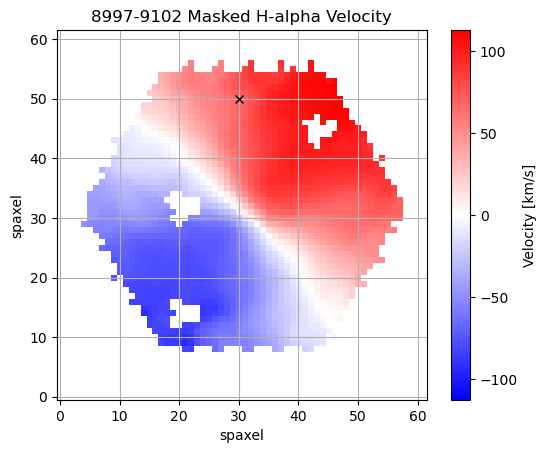

In [12]:
mhalpha_vel = ma.array(halpha_vel, mask = stellar_mask)
val_max = mhalpha_vel.max()
val_min = mhalpha_vel.min()
print('max = '+ str(val_max) + 'min = ' + str(val_min))

if (val_max >= abs(val_min)):
    lim = val_max
else:
    lim = val_min
print(lim)

plt.imshow(mhalpha_vel,cmap = 'bwr',vmin = -lim,vmax = lim)     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'Velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.plot(30,50, marker = 'x', color = 'k')
plt.grid(True)
plt.title(test_galaxy+r' Masked H-alpha Velocity')
mhalpha_vel[30,50]

In [13]:
vmax = 222*u.km/u.s
Rturn = 0.77
alpha = 1.58
R = spx_x

#R = np.arange(-5,5)


Text(0.5, 1.0, 'Model Rotation Curve')

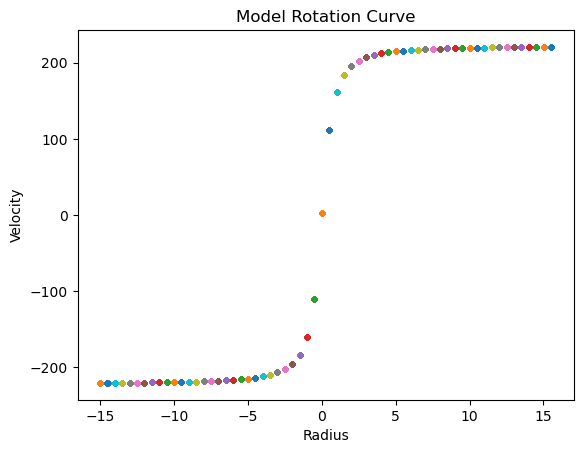

In [14]:
plt.figure()
plt.plot( R, (vmax*R)/((abs((Rturn**alpha)+(abs(R)**alpha)))**(1/alpha)), linestyle = '', marker = '.')
#plt.scatter( R, mhalpha_vel, linestyle= '', marker = '.',label="hi")
##plt.ylim(ymax = 222, ymin = -222)
plt.xlabel("Radius")
plt.ylabel("Velocity")
plt.title("Model Rotation Curve")

## deproject spaxel distance

In [15]:
z = drpalltt[loc]['z']
H_0 = 100 *(u.km/u.s)/u.Mpc
c = 299792.458 *(u.km/u.s)
spax = 1
gal_distance = (c*z)/H_0

In [16]:
gal_distance

<Quantity 97.66698655 Mpc>

In [17]:
dfc = (0.5*spax*(np.pi/180)*gal_distance).to(u.kpc)

In [18]:
dfc

<Quantity 852.30524292 kpc>

In [19]:
PA = drpalltt[loc]['nsa_elpetro_phi']
x = -spx_x
y = spx_y
q0 = 0.2
ba = drpalltt[loc]['nsa_elpetro_ba']
i_angle = np.arccos(np.sqrt(((ba)**2)-(q0**2)/(1-q0**2)))

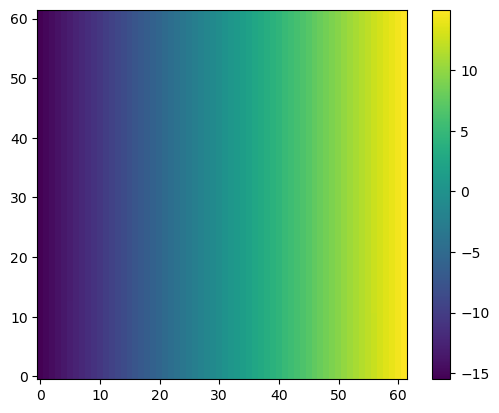

In [20]:
plt.imshow(x)
plt.colorbar()
plt.gca().invert_yaxis()


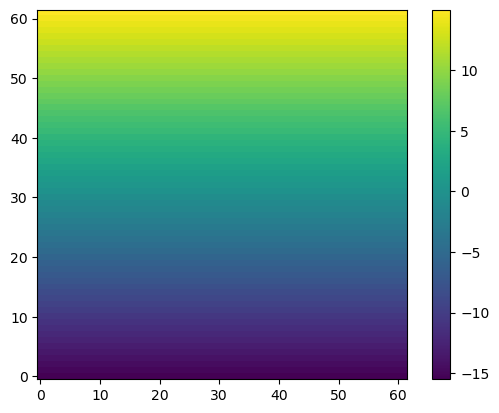

In [21]:
plt.imshow(y)
plt.colorbar()
plt.gca().invert_yaxis()

In [22]:
x_rot = (-x*np.sin(np.radians(PA))+ y*np.cos(np.radians(PA)))/(np.cos(i))
y_rot = (y*np.sin(np.radians(PA))+x*np.cos(np.radians(PA)))
#x_d, y_d  = x_rot, y_rot / np.cos(np.radians(i))
theta = np.arctan(y_rot/x_rot)


In [23]:
rt = (np.sqrt(x_rot**2+y_rot**2)*u.kpc)*np.sign(x_rot)
print(rt)

[[ 21.93773624  21.5867854   21.2418138  ... -20.88210916 -21.22040214
  -21.56498932]
 [ 21.58698781  21.23024584  20.87939057 ... -20.51373569 -20.85801242
  -21.20849595]
 [ 21.24222413  20.87959805  20.52275476 ... -20.15104057 -20.50141733
  -20.85790206]
 ...
 [ 20.89195549  20.52348108  20.16068419 ... -19.80604733 -20.16289518
  -20.52572784]
 [ 21.23021265  20.86771819  20.51101678 ... -20.16295459 -20.51360253
  -20.87034734]
 [ 21.57476129  21.21815949  20.86745425 ... -20.52584243 -20.87040129
  -21.22115773]] kpc


In [24]:
rot_v = ((vmax*abs(rt))/((((0.77*u.kpc)**1.58)+(abs(rt)**1.58))**(1/1.58)))*np.sign(x_rot)
print(rot_v)

[[ 221.29613592  221.27804679  221.25951478 ... -221.23935056
  -221.25833901 -221.27689838]
 [ 221.27805744  221.25887993  221.23919476 ... -221.21775532
  -221.2379678  -221.25768389]
 [ 221.25953729  221.23920666  221.21829594 ... -221.19549836
  -221.21701594 -221.23796146]
 ...
 [ 221.2399144   221.21833945  221.19610346 ... -221.17335263
  -221.19624209 -221.21847402]
 [ 221.25887811  221.23852525  221.21759222 ... -221.19624581
  -221.21774733 -221.23867614]
 [ 221.27741362  221.25821569  221.2385101  ... -221.21848088
  -221.23867923 -221.25838056]] km / s


Text(0.5, 1.0, 'Model Rotation Curve')

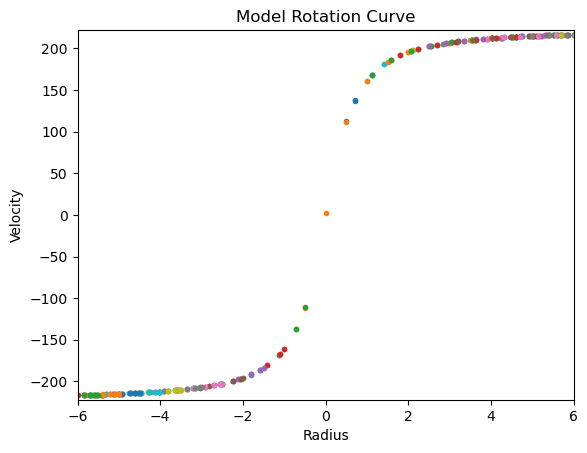

In [25]:
plt.figure()
plt.plot( rt, rot_v, linestyle = '', marker = '.')
#plt.scatter( R, mhalpha_vel, linestyle= '', marker = '.',label="hi")
plt.xlim(xmax = 6, xmin = -6)
plt.ylim(ymax = 222, ymin = -222)

plt.xlabel("Radius")
plt.ylabel("Velocity")
plt.title("Model Rotation Curve")

In [26]:
rot_v

<Quantity [[ 221.29613592,  221.27804679,  221.25951478, ...,
            -221.23935056, -221.25833901, -221.27689838],
           [ 221.27805744,  221.25887993,  221.23919476, ...,
            -221.21775532, -221.2379678 , -221.25768389],
           [ 221.25953729,  221.23920666,  221.21829594, ...,
            -221.19549836, -221.21701594, -221.23796146],
           ...,
           [ 221.2399144 ,  221.21833945,  221.19610346, ...,
            -221.17335263, -221.19624209, -221.21847402],
           [ 221.25887811,  221.23852525,  221.21759222, ...,
            -221.19624581, -221.21774733, -221.23867614],
           [ 221.27741362,  221.25821569,  221.2385101 , ...,
            -221.21848088, -221.23867923, -221.25838056]] km / s>

In [27]:
obs_v = ((rot_v*np.sin(i))*np.cos(theta)).value
mobs_v = ma.array(obs_v, mask = stellar_mask)
obs_v

array([[-7.58802566, -7.57494122, -7.55930371, ...,  0.31202192,
         0.44520342,  0.5740599 ],
       [-7.59784079, -7.58675442, -7.57316074, ...,  0.4363375 ,
         0.56969148,  0.69853372],
       [-7.60584046, -7.59682973, -7.58536938, ...,  0.56501517,
         0.69836083,  0.82700747],
       ...,
       [-1.08760302, -0.96417996, -0.83603493, ...,  7.58361875,
         7.59553301,  7.60482084],
       [-0.95563374, -0.83164623, -0.70310104, ...,  7.57094892,
         7.58514789,  7.59665665],
       [-0.82754122, -0.70318546, -0.57443944, ...,  7.55651958,
         7.57290375,  7.58654767]], shape=(62, 62))

np.float64(5.54953552389393)

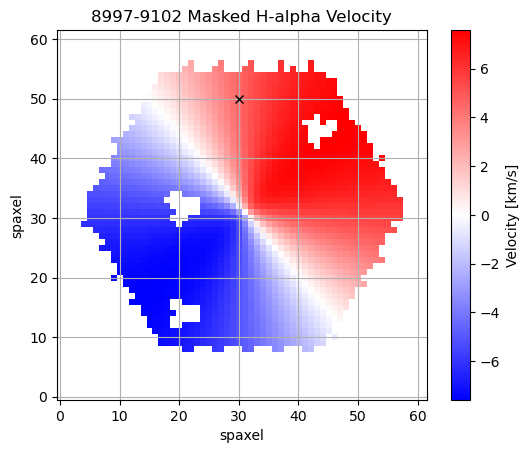

In [28]:
plt.imshow(mobs_v,cmap = 'bwr')     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'Velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.plot(30,50, marker = 'x', color = 'k')

plt.grid(True)
plt.title(test_galaxy+r' Masked H-alpha Velocity')

mobs_v[30,50]

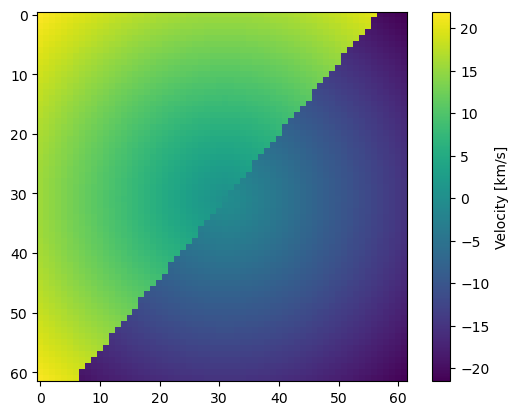

In [29]:
plt.imshow(rt.value)
plt.colorbar(label = 'Velocity [km/s]')

In [30]:
print(x[30,50])
print(y[30,50])
print(PA)
print(i)

9.493351
-0.50076455
129.725
11272


In [80]:
map_shape = mobs_v.shape


for i in range(map_shape[0]):
        for j in range(map_shape[1]):

            # De-projected radius for the current point
            r, theta[i,-j] = deproject_spaxel((i,j), (x[0,0],y[0,0]), PA, i_angle)

In [81]:
v = ((vmax*r)/((((0.77)**1.58)+(r**1.58))**(1/1.58)))


In [82]:
vel_map = v*np.sin(i)*np.cos(theta)
mvel_map = ma.array(vel_map.value, mask = stellar_mask)


max = 46.38186593182912min = -97.64522557643726
97.64522557643726


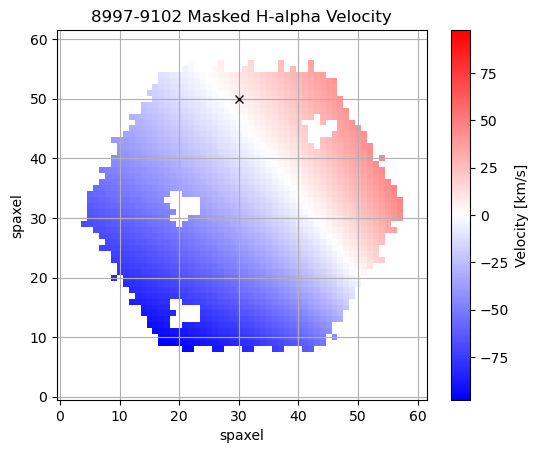

In [88]:
val_max = mvel_map.max()
val_min = mvel_map.min()
print('max = '+ str(val_max) + 'min = ' + str(val_min))

if (val_max >= abs(val_min)):
    lim = val_max
else:
    lim = abs(val_min)

plt.imshow(mvel_map,cmap = 'bwr',vmin = -lim, vmax = lim)     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'Velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.plot(30,50, marker = 'x', color = 'k')

plt.grid(True)
plt.title(test_galaxy+r' Masked H-alpha Velocity')

mvel_map[30,50]
print(lim)